In [118]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

Link to dataset: https://www.kaggle.com/loveall/clicks-conversion-tracking/home

info about dataset:

Social media campaign of an anonymous organization. Measures ad conversion data, but no time range in given. Goal is to extract info about the 3 ads used and test to see which is the most superior. Also doesn't say where the sample came from exactly and how it was collected, so some considerations need to be taken about the applicability of this data. 

In [119]:
df = pd.read_csv('KAG_conversion_data.csv')
print(df.keys())
df.head(10)
df.xyz_campaign_id.value_counts()

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')


1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

The number of people in the sample:  1143


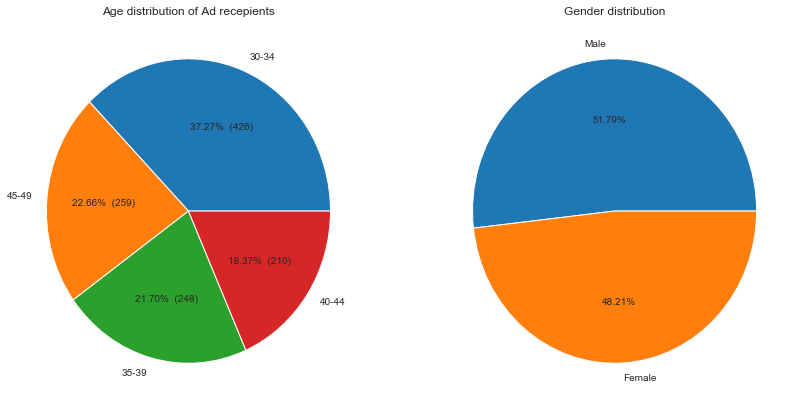

In [142]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
print("The number of people in the sample: ", len(df))
labels = ['30-34','45-49','35-39','40-44']
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.pie(df.age.value_counts(), labels=labels, autopct=make_autopct(df.age.value_counts()))
plt.title("Age distribution of Ad recepients")

plt.subplot(1,2,2)
plt.pie(df.gender.value_counts(), labels=['Male', 'Female'], autopct='%.2f%%')
plt.title("Gender distribution")
plt.show()

In [155]:
include = ['gender', 'Impressions', 'Clicks', 'Total_Conversion','Approved_Conversion']
print("Ad 916: \n", ad_916[include].describe(), "\n")
print("Ad 1178: \n", ad_1178[include].describe(), "\n")
print("Ad 936: \n", ad_936[include].describe())

Ad 916: 
         Impressions     Clicks  Total_Conversion  Approved_Conversion
count     54.000000  54.000000         54.000000            54.000000
mean    8943.055556   2.092593          1.074074             0.444444
std    11555.813220   3.017362          0.264351             0.501570
min      292.000000   0.000000          1.000000             0.000000
25%     1981.750000   0.000000          1.000000             0.000000
50%     4443.000000   1.000000          1.000000             0.000000
75%    11942.250000   2.000000          1.000000             1.000000
max    57665.000000  14.000000          2.000000             1.000000 

Ad 1178: 
         Impressions      Clicks  Total_Conversion  Approved_Conversion
count  6.250000e+02  625.000000         625.00000           625.000000
mean   3.277179e+05   57.708800           4.27040             1.395200
std    3.657869e+05   67.307334           5.67062             2.199718
min    5.264000e+03    0.000000           0.00000             0

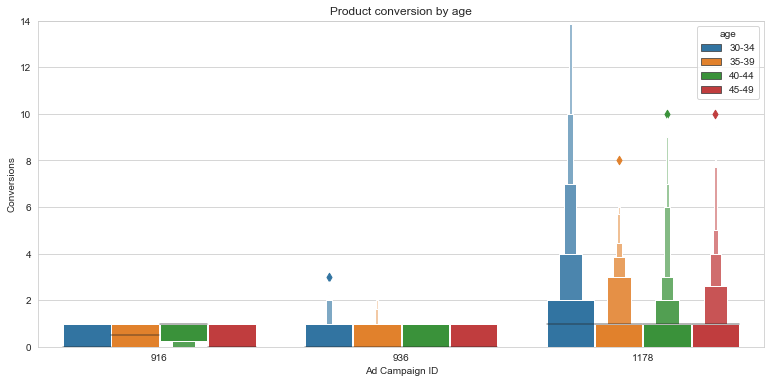

In [156]:
sns.set_style('whitegrid')
plt.figure(figsize=(13,6))
sns.boxenplot(x='xyz_campaign_id', y='Approved_Conversion', hue='age', data=df)
plt.ylim(0,14)
plt.title("Product conversion by age")
plt.xlabel("Ad Campaign ID")
plt.ylabel("Conversions")
plt.show()

In [157]:
ad_916 = df[df.xyz_campaign_id==916]
ad_1178 = df[df.xyz_campaign_id==1178]
ad_936 =df[df.xyz_campaign_id==936]

print("Mean number of people who bought the product after seeing ad 916: ", ad_916.Approved_Conversion.mean())
print("Mean number of people who bought the product after seeing ad 1178: ", ad_1178.Approved_Conversion.mean())
print("Mean number of people who bought the product after seeing ad 936: ", ad_936.Approved_Conversion.mean())
#This might make us assume that the 2nd ad campaign was the most successful

Mean number of people who bought the product after seeing ad 916:  0.4444444444444444
Mean number of people who bought the product after seeing ad 1178:  1.3952
Mean number of people who bought the product after seeing ad 936:  0.39439655172413796


In [158]:
age30 = df[df.age=='30-34']
age35 = df[df.age=='35-39']
age40 = df[df.age=='40-44']
age45 = df[df.age=='45-49']

In [137]:
#Comparing the 3 groups against each other
#ad 916 and ad 1178
print(stats.ttest_ind(ad_916.Approved_Conversion, ad_1178.Approved_Conversion, equal_var=False), "\n")

#ad 916 and 936
print(stats.ttest_ind(ad_916.Approved_Conversion, ad_936.Approved_Conversion, equal_var=False), "\n")

#ad 936 and 1178
print(stats.ttest_ind(ad_1178.Approved_Conversion, ad_936.Approved_Conversion, equal_var=False), "\n")
#We see that ad 1178 is significantly different from the other 2 ad campaigns

Ttest_indResult(statistic=-8.53777489999166, pvalue=6.635596649013762e-16) 

Ttest_indResult(statistic=0.6883488160260504, pvalue=0.493571417208413) 

Ttest_indResult(statistic=10.939474176555322, pvalue=7.010470096771101e-26) 



In [136]:
print(stats.f_oneway(ad_916.Approved_Conversion , ad_936.Approved_Conversion, ad_1178.Approved_Conversion))

print(stats.kruskal(ad_916.Approved_Conversion , ad_936.Approved_Conversion, ad_1178.Approved_Conversion))

F_onewayResult(statistic=50.54296616627857, pvalue=9.304843903413128e-22)
KruskalResult(statistic=115.11184709698777, pvalue=1.0087417643517098e-25)


Proposal

We see that ad-1178 is performing better than the other 2 ad campaigns, so the University should focus on that ad. The university should try to test the consistency of the ad-campaign before trying to improve it or otherwise test it against another design. One could try an A/A approach, whereby participants are given similar emails to see whether this email holds up its consistency or was it just a sampling bias (this ad has some outliers that contributed greatly to the success of this campaign). Other variables included could be time and or date information about the conversions. This can further highlight how the campaign performs over time. The 20-29 age group is not included in the social media campaign, so that group can be included as well possibly to expand the scope of the experiment, but it might affect the study in that the sample wont be the same as the original population sample.